In [157]:
import pandas as pd
import csv
import sqlalchemy as sqAl
from sqlalchemy import create_engine




psql_username = 'postgres'
from config import psql_password 
database_name = 'postgres'
host = 'illinoiseducation.cseojgcrzzgi.us-east-1.rds.amazonaws.com'

connection_string = f'postgresql://{psql_username}:{psql_password}@{host}:5432/{database_name}'

engine = create_engine(connection_string)

In [158]:
regression_df = pd.read_csv("clean_data/ELA and Math clean.csv")
regression_df = regression_df.astype({'ELA': int, 'Math': int})
regression_df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260001,Adams,10,Seymour High School,Payson,524,489
1,010010020260001,Adams,20,Liberty High School,Liberty,500,485
2,010010030260001,Adams,30,Central High School,Camp Point,490,488
3,010010040260001,Adams,40,Unity High School,Mendon,505,485
4,010011720220003,Adams,1720,Quincy Sr High School,Quincy,489,473
...,...,...,...,...,...,...,...
705,56099207U260001,Will,207U,Peotone High School,Peotone,514,493
706,56099209U260001,Will,209U,Wilmington High School,Wilmington,482,460
707,56099255U260001,Will,255U,Reed-Custer High School,Braidwood,480,484
708,56099365U260007,Will,365U,Bolingbrook High School,Bolingbrook,490,490


In [159]:
general_df = pd.read_sql("select * from high_school", engine)
general_df.head(2)

,RCDTS,Type,District,School Type,City,County,District Type,District Size,Student Enrollment - Total,Student Enrollment - Low Income %,...,Teacher Retention Rate,# of 12 graders who took advanced Courses,Avg Number of days of Physical Education Per Week Per Student,Community College Remediation %,Avg Class Size - High School,Chronic Absenteeism,Number of students who took AP Exams Grade 10,Number of students who passed AP Exams Grade 12,Chronic Absenteeism - Low Income,Low Income Count
0,010010010260001,School,Payson CUSD 1,HIGH SCHOOL,Payson,Adams,UNIT,MEDIUM,246.0,43.9,...,90.6,NaN,5.0,37.5,13.0,12.0,NaN,NaN,21.6,107.994
1,010010020260001,School,Liberty CUSD 2,HIGH SCHOOL,Liberty,Adams,UNIT,MEDIUM,281.0,22.4,...,84.8,23.0,3.0,20.0,22.0,2.5,NaN,NaN,7.8,62.944


In [160]:
gen_df = general_df.filter(['RCDTS',
                            'Teacher Retention Rate',
                            '# of 12 graders who took advanced Courses',
                            'Avg Number of days of Physical Education Per Week Per Student',
                            'Community College Remediation %',
                            'Avg Class Size – All Grades',
                            'Chronic Absenteeism',
                            'Chronic Absenteeism - Low Income'                            
                           ], axis = 1)
#gen_df = gen_df.dropna()
gen_df.rename(columns = {'Teacher Retention Rate':'TeachRetRate'}, inplace = True)
gen_df.rename(columns = {'# of 12 graders who took advanced Courses':'advCourses'}, inplace = True)
gen_df.rename(columns = {'Avg Number of days of Physical Education Per Week Per Student':'PhyEd'}, inplace = True)
gen_df.rename(columns = {'Community College Remediation %':'ComCollege'}, inplace = True)
gen_df.rename(columns = {'Avg Class Size – All Grades':'ClassSize'}, inplace = True)
gen_df.rename(columns = {'Chronic Absenteeism':'ChronicAbsentee'}, inplace = True)
gen_df.rename(columns = {'Chronic Absenteeism - Low Income':'ChronicLowIncome'}, inplace = True)

gen_df

,RCDTS,TeachRetRate,PhyEd,ComCollege,ClassSize,ChronicAbsentee
0,010010010260001,90.6,5.0,37.5,16.0,12.0
1,010010020260001,84.8,3.0,20.0,20.0,2.5
2,010010030260001,83.7,5.0,32.3,15.0,11.9
3,010010040260001,83.7,5.0,31.6,11.0,17.3
4,010011720220003,81.9,5.0,29.2,20.0,31.3
...,...,...,...,...,...,...
648,56099207U260001,75.5,4.0,42.6,16.0,8.0
649,56099209U260001,89.4,3.0,61.8,19.0,14.4
650,56099255U260001,83.8,4.0,41.0,22.0,8.3
651,56099365U260007,90.0,5.0,45.1,19.0,32.5


In [161]:
df = pd.merge(regression_df, gen_df, on = "RCDTS", how = "inner")
df = df.dropna()
df =df.drop(columns = ['RCDTS', 'County ', 'Dist # ', 'District Name/ School Name', 'City'])
#df = df.astype(int)
df

,ELA,Math,TeachRetRate,PhyEd,ComCollege,ClassSize,ChronicAbsentee
0,524,489,90.6,5.0,37.5,16.0,12.0
1,500,485,84.8,3.0,20.0,20.0,2.5
2,490,488,83.7,5.0,32.3,15.0,11.9
3,505,485,83.7,5.0,31.6,11.0,17.3
4,489,473,81.9,5.0,29.2,20.0,31.3
...,...,...,...,...,...,...,...
631,514,493,75.5,4.0,42.6,16.0,8.0
632,482,460,89.4,3.0,61.8,19.0,14.4
633,480,484,83.8,4.0,41.0,22.0,8.3
634,490,490,90.0,5.0,45.1,19.0,32.5


In [162]:
X = df.drop(columns = ['ELA', 'Math'], axis = 1)
X.head(2)

,TeachRetRate,PhyEd,ComCollege,ClassSize,ChronicAbsentee
0,90.6,5.0,37.5,16.0,12.0
1,84.8,3.0,20.0,20.0,2.5


In [163]:
y = df['Math']

In [164]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [165]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [166]:
y_prediction =  LR.predict(x_test)
y_prediction


array([506.3878867 , 448.55940776, 506.91362534, 525.99894866,
       414.92659367, 528.76734551, 505.02288909, 512.92739358,
       497.0097432 , 500.77706481, 452.50398753, 463.71197437,
       415.60493926, 530.58240609, 486.63339704, 484.78709365,
       482.09511211, 404.23427599, 511.65439918, 436.56736816,
       463.30402093, 522.08146599, 500.00325548, 448.40380532,
       516.66740968, 503.75618145, 490.50357053, 407.34848366,
       493.59664269, 465.38490127, 471.75329307, 524.30142573,
       529.61248971, 507.60461062, 505.61896004, 500.18250838,
       481.479384  , 482.24903989, 490.70233395, 488.76118171,
       470.62825788, 508.98384393, 515.72420656, 488.15030202,
       507.9642646 , 502.87852606, 525.17565825, 510.8284962 ,
       403.56909467, 379.86451143, 485.42505119, 479.42631646,
       433.66441681, 504.21332964, 516.10811845, 491.84791363,
       492.74507916, 493.19930166, 490.17959323, 467.76913953,
       534.50865146, 432.32048949, 479.69856256, 445.25

r2 score is  0.4330075992614498
mean_sqrd_error is== 972.5107052693696
root_mean_squared error of is== 31.185103900249707


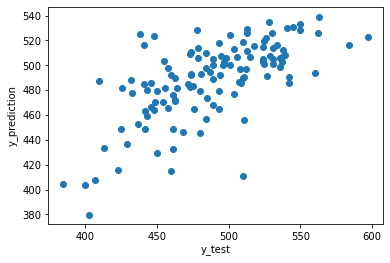

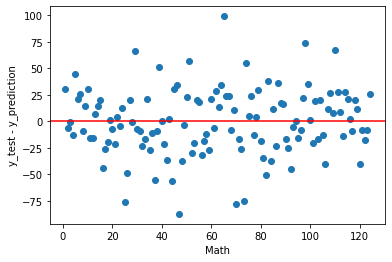

In [167]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()
plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('Math')
plt.axhline(y = 0, c = "red")
plt.show()

r2 score is  0.45660636757980644
mean_sqrd_error is== 670.0887062533252
root_mean_squared error of is== 25.88607166515084


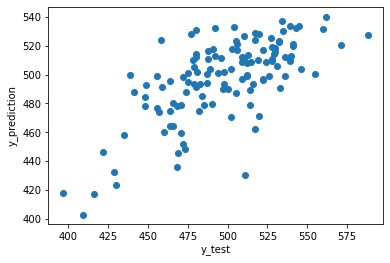

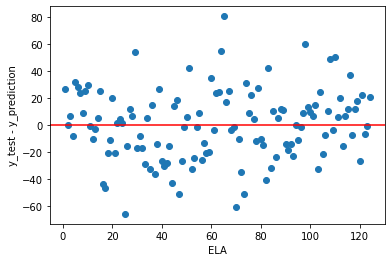

In [168]:
y = df['ELA']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()
plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('ELA')
plt.axhline(y = 0, c = "red")
plt.show()

r2 score is  0.4566308491664043
mean_sqrd_error is== 3081.631452914302
root_mean_squared error of is== 55.512444126648774


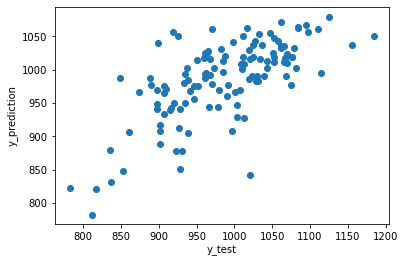

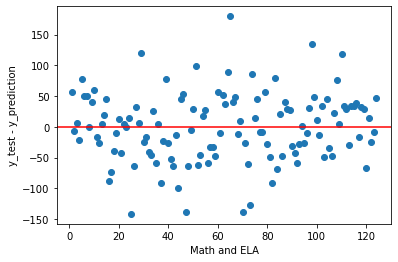

In [169]:
df['ELA/Math Sum'] = df['ELA'] +  df['Math']
y = df['ELA/Math Sum']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()
plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('Math and ELA')
plt.axhline(y = 0, c = "red")
plt.show()